# Reading and plotting

## Reading different data formats

Data comes in many differents forms. Few common data formats are:
 - Tabular data. Often fields separated by tabs or variable number of spaces
 - Comma Separated Values (CSV), or semicolon separated values 
 - Excel spreadsheets, or libreoffice
 - [Hierarchical Data Format](https://support.hdfgroup.org/HDF5/), like HDF5, MATLAB native
 - [Apache Parquet](https://en.wikipedia.org/wiki/Apache_Parquet) format
 - [Feather file format](https://blog.rstudio.com/2016/03/29/feather/)
 - Common Data Format (CDF) or NetCDF 
 - Databases usign Structured Query Language (SQL)
 - And many many others. See more from [Wikipedia](http://fileformats.archiveteam.org/wiki/Scientific_Data_formats)

## What data format to use?

- The text and spreadsheet based 2-dimensional data formats are suitable for small data sets, if you do not need complex data structures: 
   - A good data format allows storing metadata with the data, can store data structures like matrices, can natively handle various data formats, such as timestamps, numbers and strings, etc. Some data formats can also support transparent compression of data. With bigger data sets, possibilities to store data in binary form is also a benefit.
   - CSV is probably the most common data format, but it is not well standardized. Therefore CSV reading requires often plenty of parsing before it works. It is also verbose and requires a lot of space. Almost the same applies to tabular data. 
   - Spreadsheet formas may be even a little better, but they also support only 2-dimensional data sets, and including metadata is not supported.
- For lighter data sets, the Feather is a very good option. It is fast and interoperable. Based on Apache Arrow library, which makes reading and writing of data very fast.
- Parquet, designed for Haddop, is often used in Big data domain. Use it if you need to store huge data sets.
- Hierarchical data format (HDF) supports transparent compression, metadata and various data structures. It can be explored without external documentation of the content. It is commonly used for many purposes. For example, MATLAB uses it. NetCDF is a simplified subset of HDF. Use HDF instead of NetCDF if possible. **Note**: Using HDF5 requires installing `pytables` module in Python.



## Asphalt heat data

The data is clearly in CSV-file with three columns, where field separator is semicolon. The first column is a timestamp in ISO format. Other columns are numerical and they use decimal points. The first row is a colun header.

`Timestamp; Irradiance; Heatflux
2014-10-01 03:00:20;   0.2; -83.1
2014-10-01 03:15:20;   0.2; -82.8
2014-10-01 03:30:20;   0.1; -82.5
2014-10-01 03:45:20;   0.1; -82.3
2014-10-01 04:00:20;   0.1;
2014-10-01 04:15:20;   0.1; -82.2
......`


## Pandas
Parsing simple CSV data files is easy with many methods, but it is easiest, if you use [Pandas](https://pandas.pydata.org/) statistics package. And because Pandas provides so many other features as well, let's take a closer look on that. Read [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) at this stage.

It is really convenient to let Pandas parse the timestamps by defining the columns whics are being parsed with `parse_dates` argument. You can just list the columns which contain timestamp values.

This data is clearly time series data, so it is best to be indexed with a timestamp. In this way you can very easily select data based on the timestamp and if you plot the data, you get time axis automatically in the x-axis. This can be achieved by defining the column which is used as an index with `index_col` parameter.

It is really inconvenient that by default Pandas interpretes whitespaces as important in the beginning of fields. For example, in the previous dataset, the header included the column names in following format `Timestamp; Irradiance; Heatflux`. There is a whihtespace in between semicolon and the next field name, `; Irradiance` for instance. By default Pandas parses ' Irradiance' as the name of this field. It has some consequences. Therefore it is good practice to use `skipinitialspace` parameter to prevent this.


Now we are well prepared to read the data using `pd.read_csv` function, which returns a data structure, called as Pandas dataframe. It is a little bit similar than data frames in R. Basically it is simiar than numpy array, but it has also many more advanced features.

After reading the pandas dataframe, we can print the shape (number of rows and columns in the dataframe) and the head (the first rows) of the dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

D=pd.read_csv('data/asphaltHeat.csv', sep=';', parse_dates=[0], index_col=0, skipinitialspace=True)
#D=pd.read_csv('data/asphaltHeat.csv', sep=';', skipinitialspace=True)
print(D.shape)
D.head(6)

(2968, 2)


,Irradiance,Heatflux
Timestamp,,
2014-10-01 03:00:20,0.2,-83.1
2014-10-01 03:15:20,0.2,-82.8
2014-10-01 03:30:20,0.1,-82.5
2014-10-01 03:45:20,0.1,-82.3
2014-10-01 04:00:20,0.1,NaN
2014-10-01 04:15:20,0.1,-82.2


### Try feather

The format supports many kinds of data structures and no parsing is needed. The data just appears back to data structure without skipping spaces of parsing the dates in any specific way. The storage space is shrink to 1/3 then using feather instead of CSV.

Pandas supports many data formats, so using them is very simple.

In [40]:
D.to_feather('data/asphaltHeat.feather')
D.to_parquet('data/asphaltHeat.parquet')
D.to_hdf('data/asphaltHeat.hdf', key='asphalt')

In [41]:
featherD=pd.read_feather('data/asphaltHeat.feather')
featherD.head(6)

,Irradiance,Heatflux
Timestamp,,
2014-10-01 03:00:20,0.2,-83.1
2014-10-01 03:15:20,0.2,-82.8
2014-10-01 03:30:20,0.1,-82.5
2014-10-01 03:45:20,0.1,-82.3
2014-10-01 04:00:20,0.1,NaN
2014-10-01 04:15:20,0.1,-82.2


## Missing data
- In the original CSV-file, Heatflux data corresponding timestamp `2014-10-01 04:00:20` is missing
- It is represented by 'NaN' in ther parsed dataframe, which is which is a floating point representation of `Not a Number` value. 
- Generally it is said that this value is not available (`na`).
- Missing data can cause bias to statistical operations 
- Arithmetic operations with not a number values are undefined.

In [2]:
a=3.141
b=np.nan
print("%f + %f = %f\n" % (a,b, a+b))

3.141000 + nan = nan



But many statistical functions ni Pandas have buildin strategy for handling missing data. The result will be calculated, but there is still a danger of bias.

In [3]:
# Default behaviour for mean() function is to skip NaN values
print(D.head(6).mean())
print("\n")

# It can be explicitely set to include them, use "help(D.mean)" to get more help
print(D.head(6).mean(skipna=False))

# Describe provides a lot of statistics of the data, it ignores the NA values
# But look at the Count row. There seems to be lot less values in Heatflux
# Those are probably missing values
D.describe()


Irradiance     0.133333
Heatflux     -82.580000
dtype: float64


Irradiance    0.133333
Heatflux           NaN
dtype: float64


,Irradiance,Heatflux
count,2968.000000,2952.00000
mean,33.743093,-2.23269
std,69.410991,10.00759
min,-0.500000,-84.90000
25%,0.100000,0.00000
50%,0.300000,0.00000
75%,34.525000,0.00000
max,513.200000,36.20000


In [4]:
D.mean()

Irradiance    33.743093
Heatflux      -2.232690
dtype: float64

### Detecting NAs
NA values can be detected using isna() function

In [5]:
D.head(6).isna()

,Irradiance,Heatflux
Timestamp,,
2014-10-01 03:00:20,False,False
2014-10-01 03:15:20,False,False
2014-10-01 03:30:20,False,False
2014-10-01 03:45:20,False,False
2014-10-01 04:00:20,False,True
2014-10-01 04:15:20,False,False


In [6]:
D.Heatflux.isna()

Timestamp
2014-10-01 03:00:20    False
2014-10-01 03:15:20    False
2014-10-01 03:30:20    False
2014-10-01 03:45:20    False
2014-10-01 04:00:20     True
                       ...  
2014-10-31 22:45:20    False
2014-10-31 23:00:20    False
2014-10-31 23:15:20    False
2014-10-31 23:30:20    False
2014-10-31 23:45:20    False
Name: Heatflux, Length: 2968, dtype: bool

### Selecting based on NA status

The boolean vector about NA status can be used for selecting only NA rows or selecting all but NA rows. 
Notice that `~` is boolean NOT operator in Python. 

In [43]:
# Select all but NA rows
b=D.Heatflux.isna()
D[~b]

,Irradiance,Heatflux
Timestamp,,
2014-10-01 03:00:20,0.2,-83.1
2014-10-01 03:15:20,0.2,-82.8
2014-10-01 03:30:20,0.1,-82.5
2014-10-01 03:45:20,0.1,-82.3
2014-10-01 04:15:20,0.1,-82.2
...,...,...
2014-10-31 22:45:20,0.2,0.0
2014-10-31 23:00:20,0.2,0.0
2014-10-31 23:15:20,0.2,0.0


In [8]:
~b

Timestamp
2014-10-01 03:00:20     True
2014-10-01 03:15:20     True
2014-10-01 03:30:20     True
2014-10-01 03:45:20     True
2014-10-01 04:00:20    False
                       ...  
2014-10-31 22:45:20     True
2014-10-31 23:00:20     True
2014-10-31 23:15:20     True
2014-10-31 23:30:20     True
2014-10-31 23:45:20     True
Name: Heatflux, Length: 2968, dtype: bool

In [46]:
# All rows where Heatflux values is not known can be easily detected
# by indexing the dataframe with the boolean vector given by isna() function directly
D[D.Heatflux.isna()]

# But it is the same to use the previous b-vector like this:
#D[b]


,Irradiance,Heatflux
Timestamp,,
2014-10-01 04:00:20,0.1,NaN
2014-10-01 08:30:20,86.9,NaN
2014-10-01 16:15:20,186.2,NaN
2014-10-02 02:30:20,0.1,NaN
2014-10-02 02:45:20,0.1,NaN
2014-10-02 03:00:20,0.1,NaN
2014-10-02 03:15:20,0.1,NaN
2014-10-02 06:00:20,-0.0,NaN
2014-10-02 06:30:20,0.4,NaN


### Examples of data frame indexing

Data frame allows very convenient indexing possibilities if the key is a datetime object. One can select rows where the content of the datetime object match to specified value. For example it is possible to select rows where the hour-field of the timestamp is a certain number, thus selecting from the data all values which represent a middle of the day.

In [48]:
D[D.index.hour==12]

,Irradiance,Heatflux
Timestamp,,
2014-10-01 12:00:20,438.5,36.2
2014-10-01 12:15:20,430.4,33.6
2014-10-01 12:30:20,119.2,22.6
2014-10-01 12:45:20,288.5,12.6
2014-10-02 12:00:20,89.2,-0.0
...,...,...
2014-10-30 12:45:20,232.0,0.0
2014-10-31 12:00:20,60.2,0.0
2014-10-31 12:15:20,77.5,0.0


### Other methods for handling missing data 
The default handling of missing data is to skip them. The dataframe can be also be preprocessed to handle the missing data in following ways:

 1. Drop all rows which has missing data. Can cause bias and loss of valuable data in other columns.
 1. Drop all columns which has missing data. Causes loss of data.
 1. Fill missing data with other values, [imputation](https://en.wikipedia.org/wiki/Imputation_%28statistics%29), such as:
   1. Constants, like 0, `np.inf`, etc
   1. Mean value
   1. Previous or next available value
   1. Interpolated value
   1. Value from similar record (Hot deck)

### Drop missing values

Obsever how the shape of the data matrix is reduced.

In [11]:
print(D.shape)
print(D.dropna().shape)

(2968, 2)
(2952, 2)


In [12]:
D.Irradiance

Timestamp
2014-10-01 03:00:20    0.2
2014-10-01 03:15:20    0.2
2014-10-01 03:30:20    0.1
2014-10-01 03:45:20    0.1
2014-10-01 04:00:20    0.1
                      ... 
2014-10-31 22:45:20    0.2
2014-10-31 23:00:20    0.2
2014-10-31 23:15:20    0.2
2014-10-31 23:30:20    0.3
2014-10-31 23:45:20    0.3
Name: Irradiance, Length: 2968, dtype: float64

D.dropna() drops all rows which has na-values. It has clearly dropped 16 rows and the Irradiance field does not have NAs any longer.

### Dropping and Imputing data

NA-values can be dropped or filled, but both methods may affect the statistics.

Observe that when using various strategies, the mean is always different. What is the best strategy?

In [49]:
print(D.Irradiance.mean())
print(D.dropna().Irradiance.mean())

33.74309299191375
33.763719512195124


In [50]:
# Drop missing data, and then calculate the mean Heatflux
print(D.Heatflux.mean())  # Default behavior, do not use missing values
print(D.dropna().Heatflux.mean()) # Drop missing rows explicitely

# Impute missing values, and then calculate the mean of Heaflux
print(D.fillna(0).Heatflux.mean()) # Fill missing values with zeros
print(D.ffill().Heatflux.mean()) # Copy previous value in place of missing value
print(D.interpolate().Heatflux.mean()) # Interpolate missing values

-2.2326897018970193
-2.2326897018970193
-2.2206536388140163
-2.273247978436658
-2.272254043126685


In [19]:
D.interpolate().head(6)

,Irradiance,Heatflux
Timestamp,,
2014-10-01 03:00:20,0.2,-83.10
2014-10-01 03:15:20,0.2,-82.80
2014-10-01 03:30:20,0.1,-82.50
2014-10-01 03:45:20,0.1,-82.30
2014-10-01 04:00:20,0.1,-82.25
2014-10-01 04:15:20,0.1,-82.20


<Axes: >

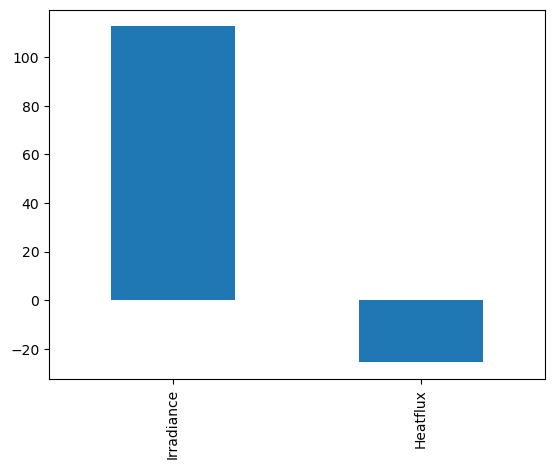

In [16]:
D.loc['2014-10-01'].interpolate().mean().plot.bar()

## Summary
There is often missing values in the data. They can be handled with many methods, but all of them have consequences.  
- Always study how much missing values there is in the data
- Be aware what is default missing data handling method and think if it is the best in your case
- Pandas and other sofware support many missing data handling methods if the default is not sufficient
- Make sure that you know how your missing data hanling method affects to the statistics

## Slicing pandas data frame
Pandas dataframes support really versatile methods for indexing in columnvise and rowvise directions
 - Dataframes can be indexed using column names either using dot-notation or column name in square brackets. Using column names is usefull if your data structure later changes. It makes also the code as easier to understand.

In [51]:
print(D.columns)

# THese two lines produce identical results
D.Irradiance.head()
D['Irradiance'].head()

Index(['Irradiance', 'Heatflux'], dtype='object')


Timestamp
2014-10-01 03:00:20    0.2
2014-10-01 03:15:20    0.2
2014-10-01 03:30:20    0.1
2014-10-01 03:45:20    0.1
2014-10-01 04:00:20    0.1
Name: Irradiance, dtype: float64

Dataframes can also be indexed using row index. If it is a time field, it can handle many different time formats.

Notice that when only the day is specified in datetime index, every timestamp from the specified day will be selected.

In [52]:
D.loc['2014-10-15', 'Irradiance'] 

Timestamp
2014-10-15 00:00:20    0.3
2014-10-15 00:15:20    0.3
2014-10-15 00:30:20    0.3
2014-10-15 00:45:20    0.3
2014-10-15 01:00:20    0.3
                      ... 
2014-10-15 22:45:20    0.2
2014-10-15 23:00:20    0.2
2014-10-15 23:15:20    0.3
2014-10-15 23:30:20    0.3
2014-10-15 23:45:20    0.3
Name: Irradiance, Length: 96, dtype: float64

Dataframes support also MATLAB or R like location based indexing:

In [53]:
D.iloc[0:5, :2]

,Irradiance,Heatflux
Timestamp,,
2014-10-01 03:00:20,0.2,-83.1
2014-10-01 03:15:20,0.2,-82.8
2014-10-01 03:30:20,0.1,-82.5
2014-10-01 03:45:20,0.1,-82.3
2014-10-01 04:00:20,0.1,NaN


Read more from the tutorialspoint article [Python Pandas - Indexing and Selecting Data](https://www.tutorialspoint.com/python_pandas/python_pandas_indexing_and_selecting_data.htm).

### Plotting
The data in the dataframe can be plotted almost automatically

Decorations can be added easily. Notice that x and y labels support LaTeX format, to add mathematical notation. The time representation is automatically adjusted, when the datafram index is a datetime object.

<Axes: xlabel='Timestamp'>

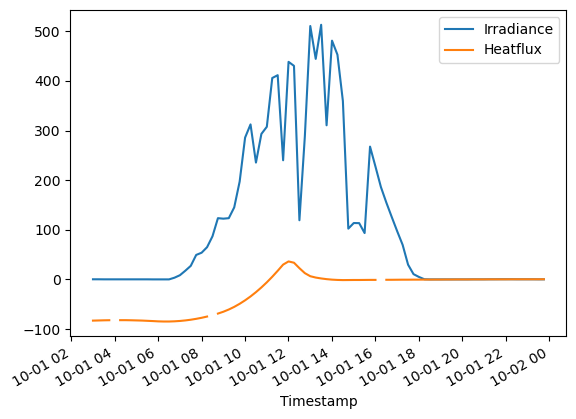

In [57]:
# Select one day, and plot the data
(D.loc['2014-10-01']).plot()
#(D.loc['2014-10']).plot()

Text(0.5, 0, 'Time')

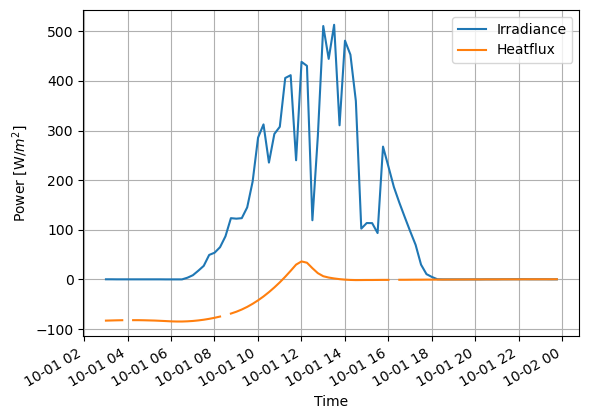

In [58]:
# Lets make some decorations to the plot
ax=(D.loc['2014-10-01']).plot()
ax.grid()
ax.set_ylabel('Power [W/$m^2$]')
ax.set_xlabel('Time')

In [59]:
D.columns

Index(['Irradiance', 'Heatflux'], dtype='object')

Notice that the missing values are causing some breaks in the lines. They can be fixed with imputation.

In this case, the interpolation is clearly the best method to handle missing data. Otherwise total power integration would be more wrong.

The figures can be also saved as images with various formats.

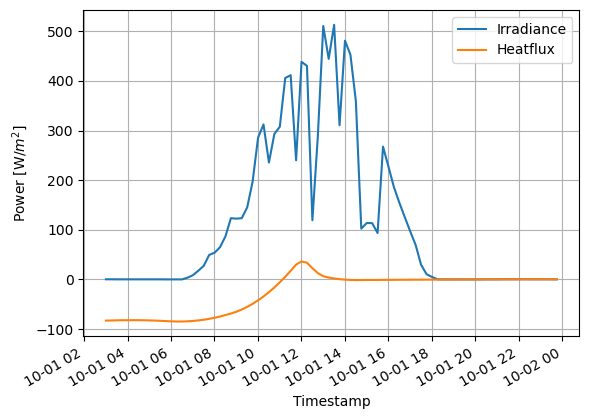

In [63]:
fig=(D.loc['2014-10-01']).interpolate().plot()
#ax=(D.loc['2014-10-01']).dropna().plot()
fig.grid()
fig.set_ylabel('Power [W/$m^2$]')
plt.savefig('figure1.svg')
plt.savefig('figure1.png')

## More challenging dataset

(Very difficult actually)

Water quality data (CSV)

`name of the station;ID-number of the station;ETRS-coordinates east;ETRS-coordinates north;max depth of the station;date;sampling depth;Faecal enterococci (kpl/100ml);Oxygen saturation (kyll.%);Dissolved oxygen (mg/l);Suspended solids, coarse (mg/l);Chlorophyll a (µg/l);Total phosphorous, unfiltered (µg/l);Total nitrogen, unfiltered (µg/l);Coliform bacteria thermotolerant (kpl/100ml);Temperature (°C);Nitrate as nitrogen, unfiltered (µg/l);Nitrate as nitrogen, unfiltered (µg/l);Nitrite nitrate as nitrogen, unfiltered (µg/l);Secchi depth (m);pH  ;Salinity (<89>);Turbidity (FNU);Conductivity (mS/m)
Et kaup selkä 1;5520;227911;7005357;2.4;19.3.1974 0:00;;;;;;;;;;;;;;0.5;;;;
Et kaup selkä 1;5520;227911;7005357;2.4;19.3.1974 0:00;1,0;0;56;7.9;;;14;4100;0;0.3;;;;;4.6;;8.1;231
Et kaup selkä 1;5520;227911;7005357;2.4;12.6.1974 0:00;;;;;;;;;;;;;;1.1;;;;
Et kaup selkä 1;5520;227911;7005357;2.4;12.6.1974 0:00;1,0;0;104;10.3;;;20;410;0;14.5;;;;;8.1;;;627
Et kaup selkä 1;5520;227911;7005357;2.4;21.10.1974 0:00;;;;;;;;;;;;;;1;;;;
Et kaup selkä 1;5520;227911;7005357;2.4;21.10.1974 0:00;1,0;3;93;12.2;;;20;1200;79;2.9;;;;;7.2;;;594
Et kaup selkä 1;5520;227911;7005357;2.4;4.6.1975 0:00;;;;;;;;;;;;;;1;;;;
Et kaup selkä 1;5520;227911;7005357;2.4;4.6.1975 0:00;1,0;2;102;11;;;40;560;17;10.5;;;;;6.7;;7.8;390`


The dataset is clearly in CSV-format, and it has semicolon separated values. Some columns are numerical and some others are strings. Column names are rather long strings. The fifth column (column number 4, if indexed from zero) is the timestamp. Lets read it:

In [64]:

WD=pd.read_csv('data/waterquality.csv', sep=';', parse_dates=[5], dayfirst=True, index_col=5, skipinitialspace=True, encoding='latin1')
print(WD.shape)

# Show five first rows, and all columns starting from column 4 (fifth column)
WD.loc['1987-07'].iloc[:,4:]

(790, 23)


,max depth of the station,sampling depth,Faecal enterococci (kpl/100ml),Oxygen saturation (kyll.%),Dissolved oxygen (mg/l),"Suspended solids, coarse (mg/l)",Chlorophyll a (µg/l),"Total phosphorous, unfiltered (µg/l)","Total nitrogen, unfiltered (µg/l)",Coliform bacteria thermotolerant (kpl/100ml),Temperature (°C),"Nitrate as nitrogen, unfiltered (µg/l)","Nitrate as nitrogen, unfiltered (µg/l).1","Nitrite nitrate as nitrogen, unfiltered (µg/l)",Secchi depth (m),pH,Salinity (),Turbidity (FNU),Conductivity (mS/m)
date,,,,,,,,,,,,,,,,,,,
1987-07-13 12:00:00,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1987-07-13 12:00:00,2.4,"0,0-1,2",NaN,NaN,NaN,NaN,4.4,12.0,650.0,NaN,16.6,330.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1987-07-13 12:00:00,2.4,"0,0-1,5",NaN,NaN,NaN,NaN,3.2,11.0,720.0,NaN,16.3,410.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1987-07-27 12:00:00,2.4,"0,0-2,0",NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
WD.columns

Index(['name of the station', 'ID-number of the station',
       'ETRS-coordinates east', 'ETRS-coordinates north',
       'max depth of the station', 'sampling depth',
       'Faecal enterococci (kpl/100ml)', 'Oxygen saturation (kyll.%)',
       'Dissolved oxygen (mg/l)', 'Suspended solids, coarse (mg/l)',
       'Chlorophyll a (µg/l)', 'Total phosphorous, unfiltered (µg/l)',
       'Total nitrogen, unfiltered (µg/l)',
       'Coliform bacteria thermotolerant (kpl/100ml)', 'Temperature (°C)',
       'Nitrate as nitrogen, unfiltered (µg/l)',
       'Nitrate as nitrogen, unfiltered (µg/l).1',
       'Nitrite nitrate as nitrogen, unfiltered (µg/l)', 'Secchi depth (m)',
       'pH  ', 'Salinity ()', 'Turbidity (FNU)', 'Conductivity (mS/m)'],
      dtype='object')

There seems to be a lot of NA values in the data. Futher examination reveals that there are often two records for the same timestamp. The first record has only couple of values and the rest are NAs, whereas the second record contains most other values, but those couple of values given in the previous record are NAs. Obviously these succeeding rows needs to be merged. This can be done "easily" by groubing the data by timestamp, and using the first value of each column which is not NA.

In [70]:
# This, a little bit complex statement, chains severa sequential actions together
# 1) group the dataframe WD by an index, called as 'date'
# 2) apply an aggregate fuction first() to the groupped dataframe to replace the 
#    value of each column in a group with the first value observed witin a group
# 3) Take take values observed in July 1987 from the corrected dataframe for further study
# 4) Select all colums, except the first four columns from the resulting dataframe
WD.groupby('date').first().loc['1987-07'].iloc[:,4:]

,max depth of the station,sampling depth,Faecal enterococci (kpl/100ml),Oxygen saturation (kyll.%),Dissolved oxygen (mg/l),"Suspended solids, coarse (mg/l)",Chlorophyll a (µg/l),"Total phosphorous, unfiltered (µg/l)","Total nitrogen, unfiltered (µg/l)",Coliform bacteria thermotolerant (kpl/100ml),Temperature (°C),"Nitrate as nitrogen, unfiltered (µg/l)","Nitrate as nitrogen, unfiltered (µg/l).1","Nitrite nitrate as nitrogen, unfiltered (µg/l)",Secchi depth (m),pH,Salinity (),Turbidity (FNU),Conductivity (mS/m)
date,,,,,,,,,,,,,,,,,,,
1987-07-13 12:00:00,2.4,"0,0-1,2",NaN,NaN,NaN,NaN,4.4,12.0,650.0,NaN,16.6,330.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN
1987-07-27 12:00:00,2.4,"0,0-2,0",NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are still a lot of missing values, but the confusion of which value to select for a certain time is now gone.

Lets study the average temperature over the whole data.


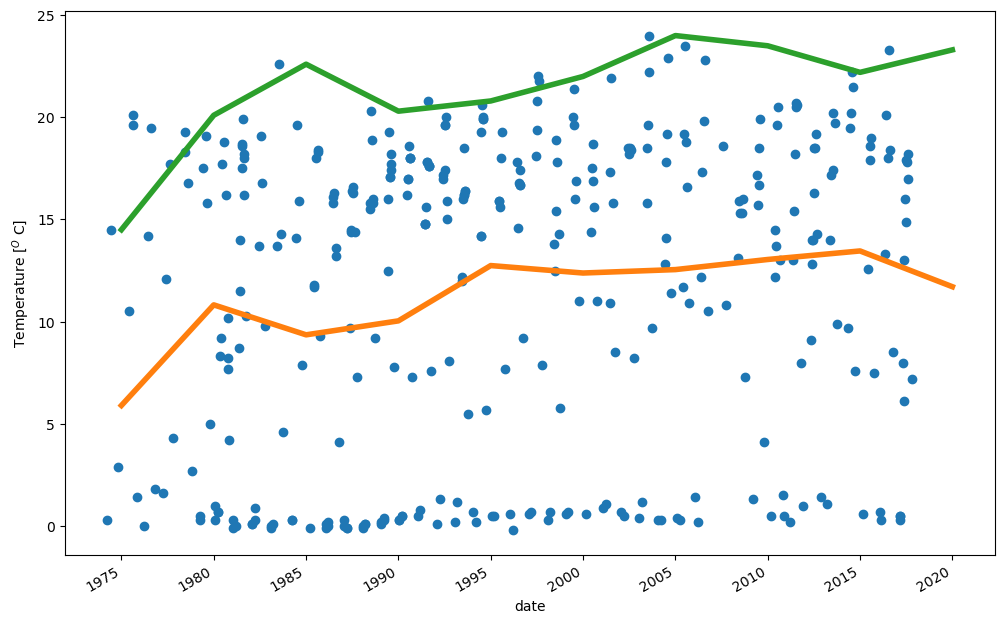

In [72]:
# Temperaturecolumn
i=14

# Plot individual observations as circles
ax=WD.iloc[:,i].plot(style='o')
ax.set_ylabel('Temperature [$^O$ C]')

# Resample the data so that it has only one value every 
# 5 years. The value is obtained by calculating an average
# or selecting the maximum value over 5 years period
# Then plot the resulting resampled data
WD.iloc[:,i].resample('5YE').mean().plot(linewidth=4, figsize=(12,8))
WD.iloc[:,i].resample('5YE').max().plot(linewidth=4)

# Save the images to the directory output as different formats
plt.savefig('output/Temperatureprofile.pdf')
plt.savefig('output/Temperatureprofile.png')
plt.savefig('output/Temperatureprofile.svg')


Study the general statistics of the data. Check for example 
1. How many missing values are in chlorophyll observations
1. What is typical chlorophyll value, and within what range it is varying

In [73]:
WD.iloc[:,10:].describe()

,Chlorophyll a (µg/l),"Total phosphorous, unfiltered (µg/l)","Total nitrogen, unfiltered (µg/l)",Coliform bacteria thermotolerant (kpl/100ml),Temperature (°C),"Nitrate as nitrogen, unfiltered (µg/l)","Nitrate as nitrogen, unfiltered (µg/l).1","Nitrite nitrate as nitrogen, unfiltered (µg/l)",Secchi depth (m),pH,Salinity (),Turbidity (FNU),Conductivity (mS/m)
count,187.000000,266.000000,260.000000,114.000000,360.000000,30.000000,26.000000,75.000000,282.000000,258.000000,110.000000,223.000000,264.000000
mean,7.655615,20.163534,1080.038462,11.263158,11.686667,304.433333,1.884615,456.253333,1.295390,7.104729,3.276545,5.635471,583.718182
std,5.962969,18.260188,978.456944,22.860892,7.505963,597.447368,2.355027,697.891537,0.534733,0.883085,1.193004,6.581787,189.529933
min,0.300000,2.000000,140.000000,0.000000,-0.200000,2.000000,0.000000,2.000000,0.200000,4.300000,0.100000,0.460000,25.600000
25%,3.700000,11.000000,470.000000,1.000000,2.850000,2.000000,0.000000,2.000000,0.900000,6.600000,2.425000,1.750000,477.500000
50%,5.900000,15.500000,665.000000,3.000000,14.400000,43.500000,1.500000,51.000000,1.300000,7.300000,3.500000,3.200000,615.000000
75%,10.500000,22.000000,1400.000000,11.000000,17.900000,367.500000,2.750000,680.000000,1.800000,7.800000,4.275000,6.400000,739.250000
max,36.000000,218.000000,6700.000000,130.000000,24.000000,3100.000000,11.000000,2900.000000,2.500000,8.400000,5.100000,42.000000,890.000000
